<a href="https://colab.research.google.com/github/ayarii/From-Machine-Learning-towards-Deep-Learning/blob/main/Formation_Taima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np # traitement des arrays numériques
np.random.seed = 2017 # pour des résultats reproductibles
import matplotlib.pyplot as plt # traçage de graphiques
import pandas as pd #BD
import scipy.stats 

In [23]:
mu1=[1, 1, 1]; #variance
rng = np.random.default_rng(2021) #genration des données aléatoire
sigma1= np.identity(3) #3=dimension matrice , sigma = matrice de covariance
mvn1= rng .multivariate_normal(mu1,sigma1,1000)

In [24]:
mu2=[4, 3, 2];
rng = np.random.default_rng(2021) #genration des données aléatoire
sigma2= 2*sigma1 #3=dimension matrice , sigma = matrice de covariance
sigma2= np.identity(3) 
mvn2= rng .multivariate_normal(mu2,sigma2,1000)

In [25]:
sigma1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
sigma2

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [27]:
mvn1

array([[ 0.9311388 ,  0.31303441,  0.2115132 ],
       [ 2.07600685,  0.98947583,  0.54434737],
       [ 0.96133853, -1.62149639,  0.17676013],
       ...,
       [ 0.10313006,  0.92122234,  0.35163724],
       [ 0.28665132,  0.62389029,  1.87052273],
       [ 1.62275371,  0.90621569,  1.63313858]])

In [28]:
mvn2

array([[ 3.90261556,  2.02848394,  0.88491128],
       [ 5.52170348,  2.98511658,  1.35560987],
       [ 3.94532443, -0.70735575,  0.83576301],
       ...,
       [ 2.73163436,  2.88859157,  1.0830766 ],
       [ 2.99117262,  2.46810055,  3.23110505],
       [ 4.88070674,  2.86736895,  2.89539317]])

#Normaliser les données 

In [29]:
from sklearn.preprocessing import StandardScaler #sklearn bib ML-DEEP
X_std = StandardScaler().fit_transform(mvn1)

In [38]:
from sklearn.preprocessing import StandardScaler #sklearn bib ML-DEEP
X_std = StandardScaler().fit_transform(mvn2)

## 1-Décomposition propre - Calcul des vecteurs propres et des valeurs propres


In [30]:
mean_vec = np.mean(X_std, axis=0) #moyenne des donéees
print('means vector \n%s' %mean_vec)

means vector 
[-6.14952533e-16 -4.07174294e-17 -5.87752069e-16]


In [31]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.001001   -0.06225843  0.06038322]
 [-0.06225843  1.001001   -0.0316387 ]
 [ 0.06038322 -0.0316387   1.001001  ]]


##décomposition propre sur la matrice de covariance :

In [32]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)  #Calculer les valeurs propres et les vecteurs propres droits d'un tableau carré.

print('Vecteurs propres \n%s' %eig_vecs)
print('\nValeurs propres \n%s' %eig_vals)

Vecteurs propres 
[[ 0.64054007 -0.76777451 -0.01518906]
 [-0.54741524 -0.47039133  0.69214778]
 [ 0.53855823  0.43503367  0.72159597]]

Valeurs propres 
[1.10497747 0.92864309 0.96938244]


## Sélection des composants principaux

In [33]:
# créer une liste de tuples (valeur propre, vecteur propre)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Trier les tuples (valeur propre, vecteur propre) de haut en bas
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Confirmer visuellement que la liste est correctement triée par valeurs propres décroissantes
print('Valeurs propres par ordre décroissant :')
for i in eig_pairs:
    print(i[0])

Valeurs propres par ordre décroissant :
1.1049774727128436
0.969382443051587
0.9286430872385731


##Matrice de projection

In [34]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), #concat entre 2 vecteurs pour données une matrice
                      eig_pairs[1][1].reshape(3,1))) #reshape: modification de dimension
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.64054007 -0.01518906]
 [-0.54741524  0.69214778]
 [ 0.53855823  0.72159597]]


## Projection sur le nouvel espace de fonctionnalité

In [35]:
X_PC1 = X_std.dot(matrix_w) #[2*3][3*1000] matrice entrée* matrice de projection

In [36]:
X_PC1

array([[-0.09028482, -1.06129978],
       [ 0.44374866, -0.354772  ],
       [ 1.01009234, -2.47667408],
       ...,
       [-0.89689019, -0.5113676 ],
       [ 0.20157035,  0.35845073],
       [ 0.77895118,  0.37104163]])

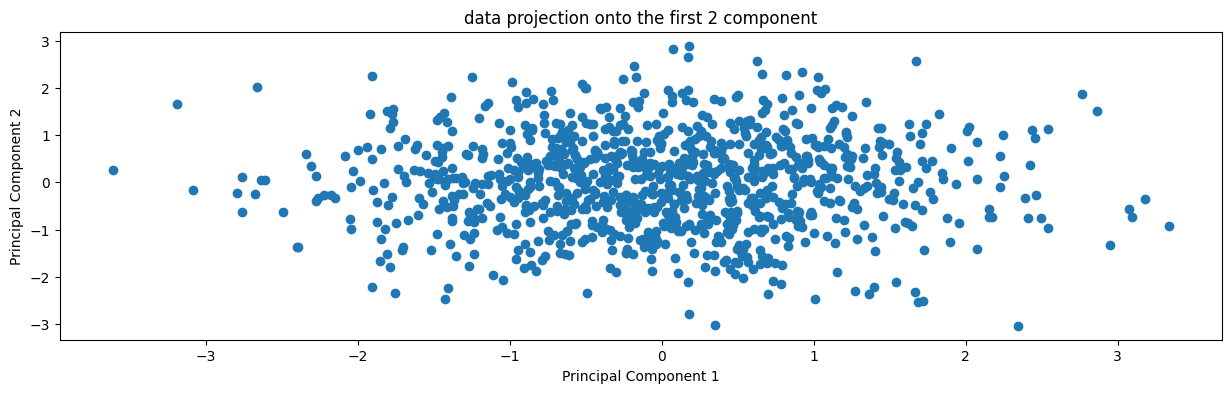

In [37]:
import matplotlib.pyplot as plt # traçage de graphiques
plt.figure(figsize=(15,4))
plt.plot(1, 2, 2)
plt.title("data projection onto the first 2 component")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(X_PC1[:, 0], X_PC1[:, 1], )
